## **Not Just a Number: Why Age & Space Matter in House Pricing**

***Contributors by Hult International Business School - February 2025*** <br>

Emily Brunner<br>
Ahmad Amine<br>
Irina CHUVASHEVA<br>
Balasubramaniyan L<br>
Pablo Benjumea Luna<br>

One critical aspect of our model is ensuring that time-based variables are correctly processed. Instead of treating Year Built, Year Remod Add, and Garage Yr Blt as regular numbers, we transformed them into interval-based features to better capture their impact on Sale Price. We computed House Age as the difference between the most recent sale year and YearBuilt, ensuring that newer houses were correctly represented. Similarly, Remod Age measured how long it had been since a house was last remodeled, capturing its maintenance level and potential value retention. For Garage Age, we accounted for missing values by setting them to zero, indicating no garage rather than treating them as missing data. This prevented errors while improving model interpretability and accuracy. This logical approach allowed the model to understand age as a dynamic factor rather than an absolute year, aligning better with real-world real estate pricing by accounting for depreciation.

To capture these insights, we calculated House Age, Remod Age, and Garage Age as follows:

- House Age = YrSold−YearBuilt
- Remod Age = YrSold−YearRemodAdd
- Garage Age =  YrSold−GarageYr

Feature selection was an essential step in refining the model. Initially, we identified features that had a strong correlation with SalePrice. Then, using a stepwise regression method, we iteratively added and removed predictors based on their statistical significance. This process allowed us to eliminate unnecessary features while keeping those that contributed the most to the model’s accuracy.

One of the most influential predictors selected was Total Living Area (TotalSF), which we engineered by combining all relevant square footage components:

- TotalSF = TotalBsmtSF + 1stFlrSF+ 2ndFlrSF

This feature significantly improved our model’s predictive power, as it captures the full usable living space in a home. TotalSF showed a high correlation with SalePrice, outperforming individual components like 1stFlrSF or TotalBsmtSF, which were previously used in isolation. By consolidating multiple related features into one, we not only enhanced model performance but also reduced redundancy, ensuring the model learned from the most relevant information.

As a result, the final set of selected predictors included HouseAge, RemodAge and TotalSF all of which were engineered to enhance predictive accuracy and real-world applicability as the model shows these features were highly correlated and statistically significant.

**Data Preperation**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

########################
## importing datasets ##
########################
# importing the training dataset
path             = ""

# training set
training_dataset = "train.csv"

# testing set
testing_dataset  = "test.csv"

# reading in the training set
housing_train = pd.read_csv(filepath_or_buffer = path + training_dataset)


# reading in the testing set
housing_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)
 
## This code will not generate an output ##


#############################
## Ensure Required Columns Exist ##
#############################

# Check if required columns exist
required_columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']
missing_columns = [col for col in required_columns if col not in housing_train.columns]

if missing_columns:
    raise ValueError(f"Missing columns in dataset: {missing_columns}")


In [7]:
housing_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Total Living Area

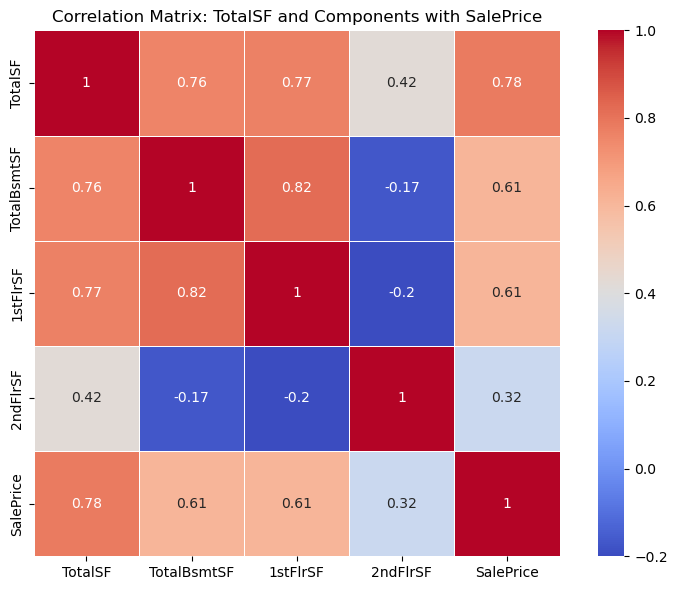

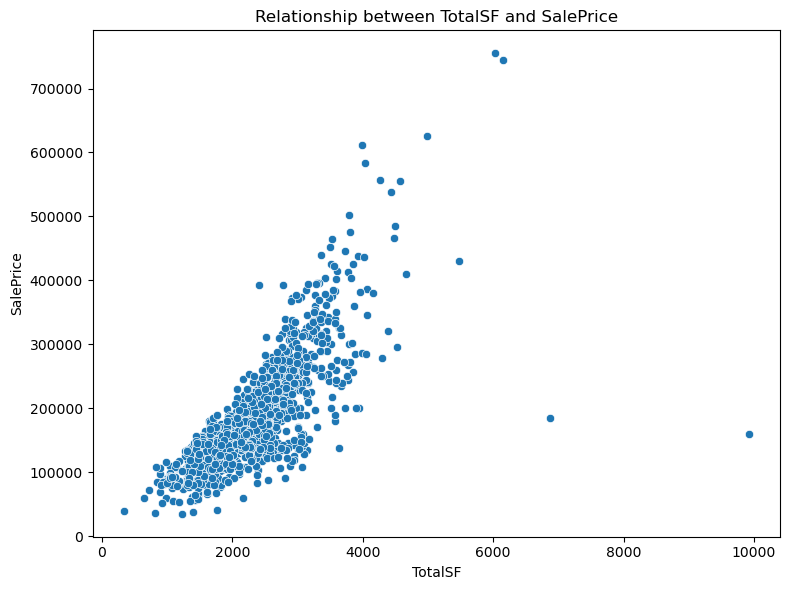

In [9]:

#############################
## Feature Engineering: TotalSF - Total Living Area ##
#############################

# Create a new feature 'TotalSF' combining basement and above-ground living space
housing_train['TotalSF'] = housing_train['TotalBsmtSF'] * 0.7 + housing_train['1stFlrSF'] + housing_train['2ndFlrSF']

#############################
## Correlation Matrix (TotalSF and SalePrice) ##
#############################

# Compute Pearson correlation with SalePrice
total_sf_corr = housing_train[['TotalSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].corr(method='pearson').round(2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(total_sf_corr, cmap='coolwarm', square=True, annot=True, linewidths=0.5)

# Layout and rendering
plt.title("Correlation Matrix: TotalSF and Components with SalePrice")
plt.tight_layout()
plt.show()

#############################
## Scatterplot: TotalSF vs SalePrice ##
#############################

# Scatterplot of TotalSF vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=housing_train)

# Titles and labels
plt.title('Relationship between TotalSF and SalePrice')
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')

# Display the plot
plt.tight_layout()
plt.show()


# Exterior

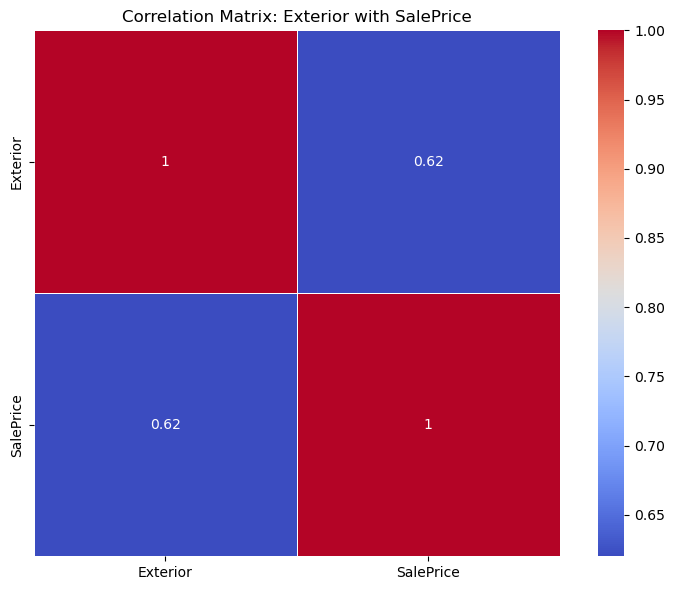

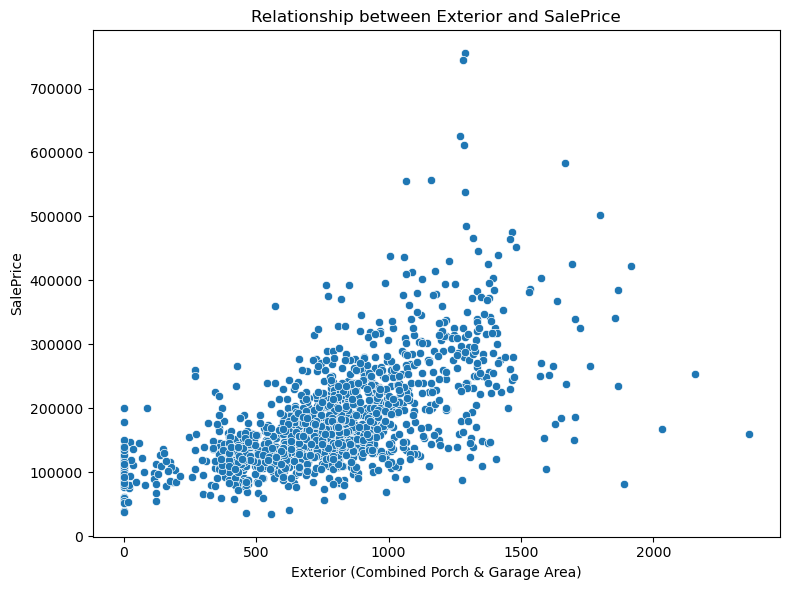

In [11]:

#############################
## Feature Engineering: Exterior ##
#############################

# Create a new feature 'Exterior' combining porch and garage area
housing_train['Exterior'] = (housing_train['OpenPorchSF'] * 0.8 + 
                             housing_train['EnclosedPorch'] * 1.2 + 
                             housing_train['GarageArea'] * 1.5)

#############################
## Correlation Matrix (Exterior and SalePrice) ##
#############################

# Compute Pearson correlation with SalePrice
exterior_corr = housing_train[['Exterior', 'SalePrice']].corr(method='pearson').round(2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(exterior_corr, cmap='coolwarm', square=True, annot=True, linewidths=0.5)

# Layout and rendering
plt.title("Correlation Matrix: Exterior with SalePrice")
plt.tight_layout()
plt.show()

#############################
## Scatterplot: Exterior vs SalePrice ##
#############################

# Scatterplot of Exterior vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Exterior', y='SalePrice', data=housing_train)

# Titles and labels
plt.title('Relationship between Exterior and SalePrice')
plt.xlabel('Exterior (Combined Porch & Garage Area)')
plt.ylabel('SalePrice')

# Display the plot
plt.tight_layout()
plt.show()

# Age-Based Features

In [13]:
##########################
## Feature Engineering: Age-Based Features ##
##########################

# Get the current year based on the latest sale year
current_year = housing_train["YrSold"].max()

# Calculate house age (years since built)
housing_train["HouseAge"] = current_year - housing_train["YearBuilt"]

# Calculate remodel age (years since last remodel)
housing_train["RemodAge"] = current_year - housing_train["YearRemodAdd"]

# Convert garage year built into age; if missing, set as 0 (indicating no garage)
housing_train["GarageAge"] = housing_train["GarageYrBlt"].apply(lambda x: current_year - x if pd.notna(x) else 0)

# Display first 5 rows to verify calculations
housing_train[['YrSold', 'YearBuilt', 'HouseAge', 'YearRemodAdd', 'RemodAge', 'GarageYrBlt', 'GarageAge']].head()


,YrSold,YearBuilt,HouseAge,YearRemodAdd,RemodAge,GarageYrBlt,GarageAge
0,2008,2003,7,2003,7,2003.0,7.0
1,2007,1976,34,1976,34,1976.0,34.0
2,2008,2001,9,2002,8,2001.0,9.0
3,2006,1915,95,1970,40,1998.0,12.0
4,2008,2000,10,2000,10,2000.0,10.0


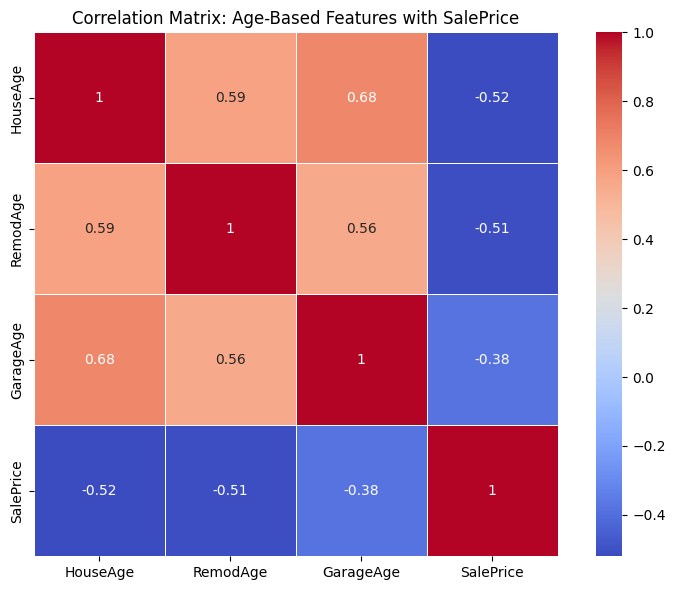

In [5]:
#############################
## Correlation Analysis: Age Features & SalePrice ##
#############################

# Select relevant columns for correlation
age_corr = housing_train[['HouseAge', 'RemodAge', 'GarageAge','SalePrice']].corr(method='pearson').round(2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(age_corr, cmap='coolwarm', square=True, annot=True, linewidths=0.5)

# Layout and rendering
plt.title("Correlation Matrix: Age-Based Features with SalePrice")
plt.tight_layout()
plt.show()